In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

<h2> data clean-up

In [2]:
df = pd.read_csv('../data/polo_data.csv',sep=';')
print(len(df))
df.head()

795


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,144.900 kr.,2016,81000,2016-12-15,Benzin,23.8,95,A,2500
1,14.900 kr.,2000,181000,2000-02-25,Benzin,17.4,50,M,4600
2,109.900 kr.,2015,105000,2015-05-07,Benzin,24.4,95,M,7173
3,269.900 kr.,2018,36000,2018-09-12,Benzin,16.9,200,A,8700
4,259.900 kr.,2019,39000,2019-04-30,Benzin,21.6,150,A,5200


In [3]:
#Cleans price and first regestration
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,144900,2016,81000,2016,Benzin,23.8,95,A,2500
1,14900,2000,181000,2000,Benzin,17.4,50,M,4600
2,109900,2015,105000,2015,Benzin,24.4,95,M,7173
3,269900,2018,36000,2018,Benzin,16.9,200,A,8700
4,259900,2019,39000,2019,Benzin,21.6,150,A,5200
...,...,...,...,...,...,...,...,...,...
790,189900,2018,88000,2018,Benzin,21.3,115,A,6500
791,249900,2019,27000,2019,Benzin,18.0,200,A,6270
792,192000,2016,42000,2015,Benzin,21.3,150,A,5700
793,73500,2010,161000,2010,Diesel,29.4,75,M,2100


In [4]:
#converts categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns = ['gear_type','fuel_type'])
df

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,144900,2016,81000,2016,23.8,95,2500,1,0,1,0
1,14900,2000,181000,2000,17.4,50,4600,0,1,1,0
2,109900,2015,105000,2015,24.4,95,7173,0,1,1,0
3,269900,2018,36000,2018,16.9,200,8700,1,0,1,0
4,259900,2019,39000,2019,21.6,150,5200,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
790,189900,2018,88000,2018,21.3,115,6500,1,0,1,0
791,249900,2019,27000,2019,18.0,200,6270,1,0,1,0
792,192000,2016,42000,2015,21.3,150,5700,1,0,1,0
793,73500,2010,161000,2010,29.4,75,2100,0,1,0,1


In [5]:
#selects target and features
X = df[['model_year', 'km','reg','fuel_economy','horse_power','gear_type_A','gear_type_M','fuel_type_Benzin','fuel_type_Diesel']]
y = df['price']

In [6]:
#Test train split of data, 33% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

<h2> Linear Regression model

In [7]:
#fits model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_train,y_train)}')

Regression score: 0.9347922139691632


In [8]:
#Test of 5 cars
print(f'Car 1: Predicted price: {regr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {regr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {regr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {regr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {regr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 181604.07kr - actual price: 169900kr
Car 2: Predicted price: 166984.84kr - actual price: 169900kr
Car 3: Predicted price: 200614.21kr - actual price: 184900kr
Car 4: Predicted price: 209201.74kr - actual price: 229900kr
Car 5: Predicted price: 99230.19kr - actual price: 74999kr


In [9]:
#Method to get prediction score
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [10]:
#Test of prediction score
y_pred = regr.predict(X_test)
get_prediction_score(y_test,y_pred)

84.10721143746885

<h2> Decision tree regressor

In [11]:
#Fit and model score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
#predictions = model.predict(X_test)
dtr.score(X_test, y_test)

0.9646636907711911

In [12]:
#Test of 5 cars
print(f'Car 1: Predicted price: {dtr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {dtr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {dtr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {dtr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {dtr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 146500.0kr - actual price: 169900kr
Car 2: Predicted price: 174800.0kr - actual price: 169900kr
Car 3: Predicted price: 179900.0kr - actual price: 184900kr
Car 4: Predicted price: 209800.0kr - actual price: 229900kr
Car 5: Predicted price: 84900.0kr - actual price: 74999kr


In [13]:
#Test of prediction score
y_pred = dtr.predict(X_test)
get_prediction_score(y_test,y_pred)

92.94114209399311

<h1>data visualization

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
price,1.000000,0.841163,-0.794087,0.845130,-0.257219,0.660011,-0.045493,0.650313,-0.650313,0.379147,-0.379147
model_year,0.841163,1.000000,-0.778177,0.994269,0.084491,0.354196,-0.014251,0.436903,-0.436903,0.300799,-0.300799
km,-0.794087,-0.778177,1.000000,-0.773245,0.188005,-0.287777,0.104005,-0.373922,0.373922,-0.524273,0.524273
reg,0.845130,0.994269,-0.773245,1.000000,0.080339,0.363502,-0.014797,0.440729,-0.440729,0.290952,-0.290952
fuel_economy,-0.257219,0.084491,0.188005,0.080339,1.000000,-0.482392,0.084000,-0.230877,0.230877,-0.697782,0.697782
horse_power,0.660011,0.354196,-0.287777,0.363502,-0.482392,1.000000,-0.003079,0.515846,-0.515846,0.250711,-0.250711
zip_code,-0.045493,-0.014251,0.104005,-0.014797,0.084000,-0.003079,1.000000,-0.049259,0.049259,-0.104612,0.104612
gear_type_A,0.650313,0.436903,-0.373922,0.440729,-0.230877,0.515846,-0.049259,1.000000,-1.000000,0.160703,-0.160703
gear_type_M,-0.650313,-0.436903,0.373922,-0.440729,0.230877,-0.515846,0.049259,-1.000000,1.000000,-0.160703,0.160703
fuel_type_Benzin,0.379147,0.300799,-0.524273,0.290952,-0.697782,0.250711,-0.104612,0.160703,-0.160703,1.000000,-1.000000


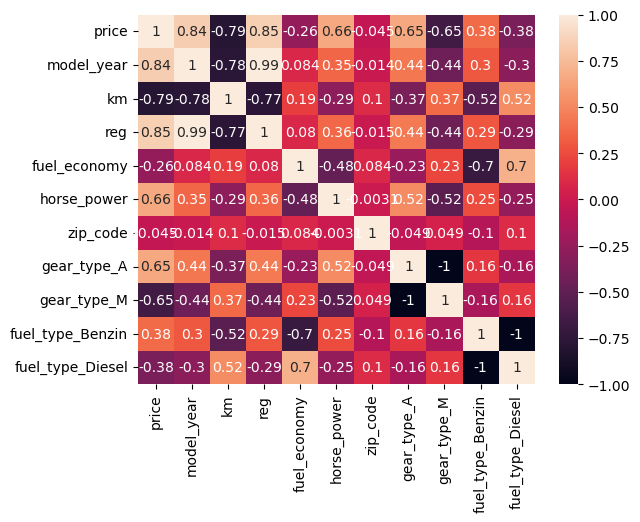

In [14]:
#Heatmap to show correlation between target and feautres
sns.heatmap(df.corr(), annot=True)
df.corr()

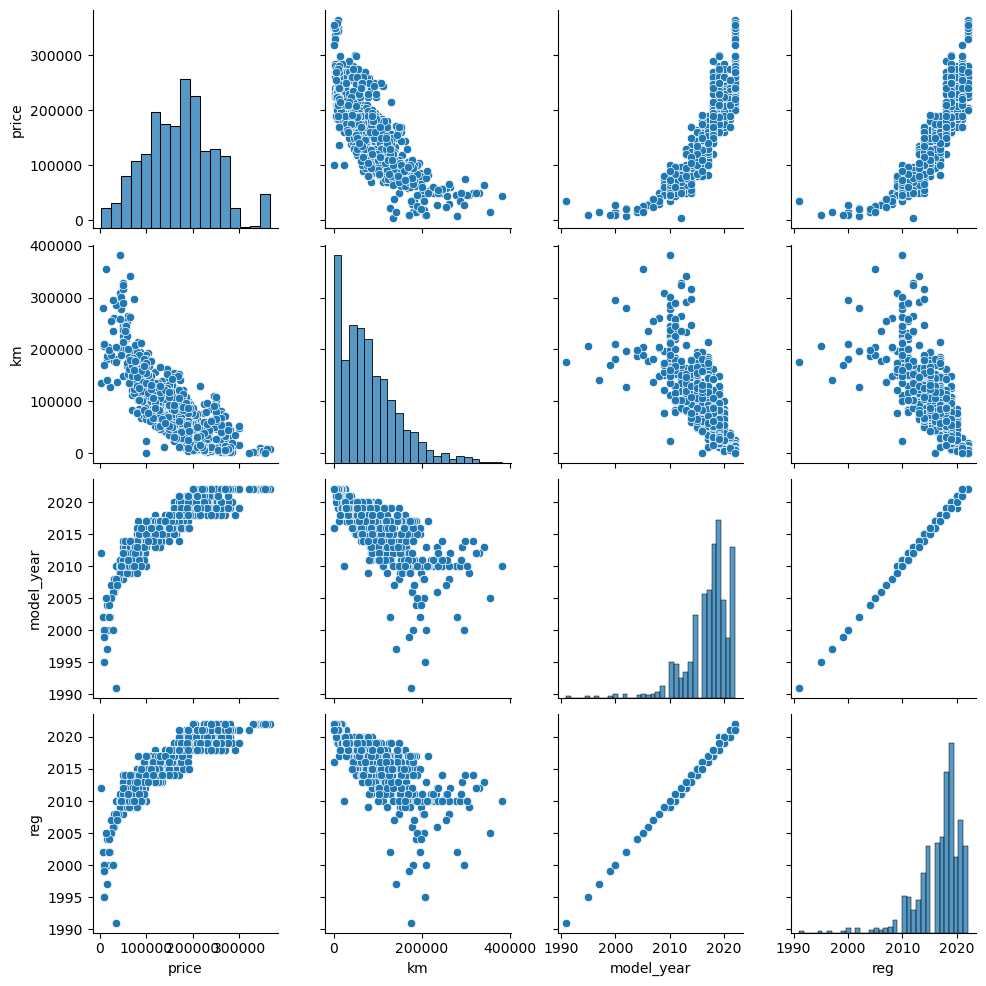

In [15]:
#Plots
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='km'>

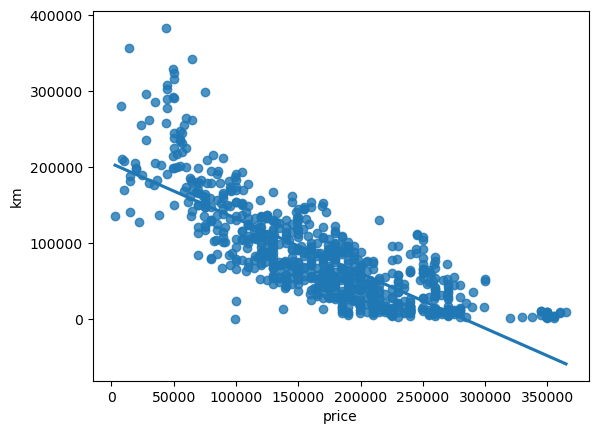

In [16]:
#regplot with price and model year
sns.regplot(x=df['price'], y=df['km'], ci=None)

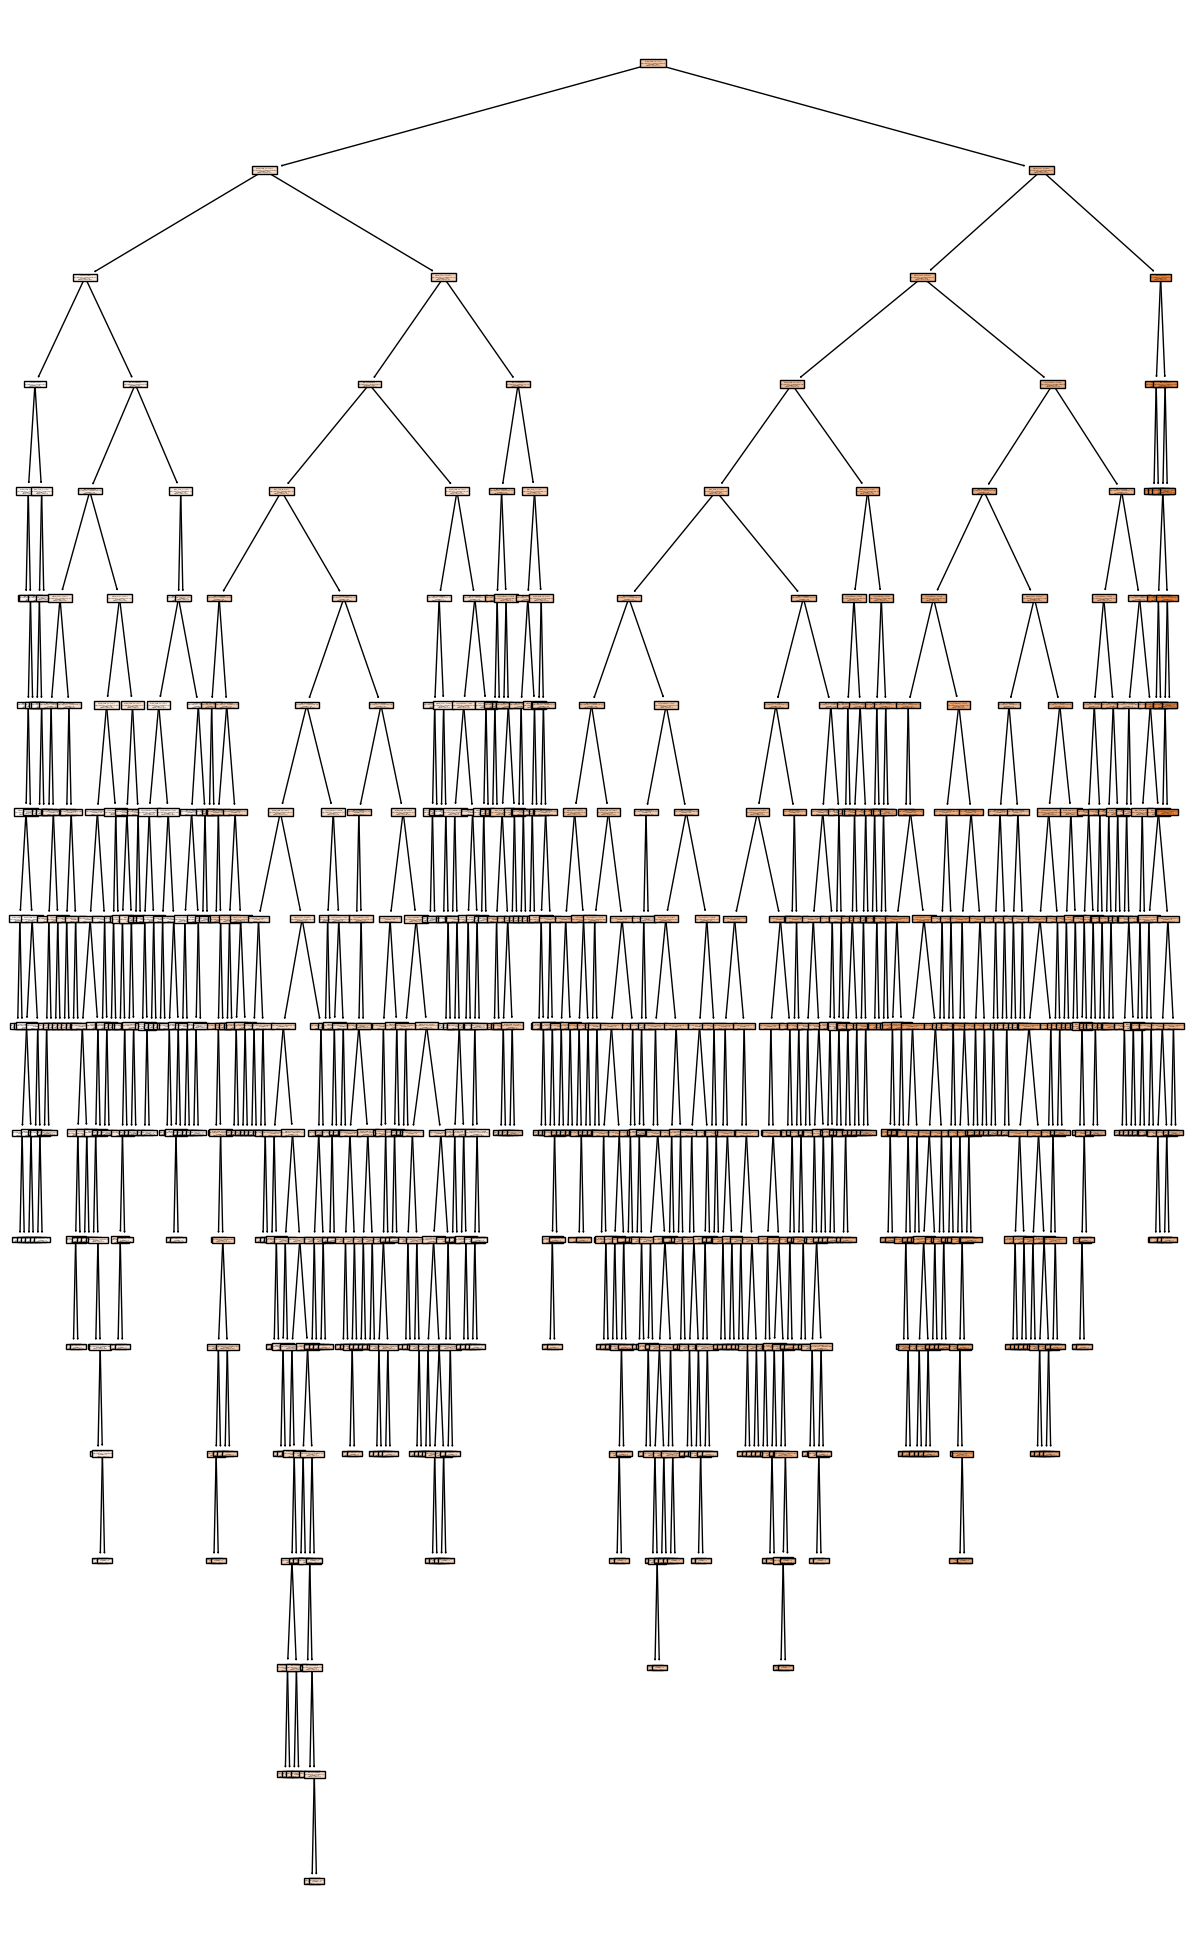

In [17]:
#map of the descision tree
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(dtr, feature_names=X.columns, filled=True)